In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
%run trial_history_calculations_functions.ipynb

In [13]:
runs=pd.read_csv('C:/Users/anasofiaccruz/Desktop/Optogenetics processed data/no_outliers_1.5iqr_no_baseline.csv')

In [15]:
create_var_shifted_column(pre, 'outcome',1)

1185

#### <font color='darkorange'> Calculates the error probabilities for given previous trial variable 

In [6]:
# Created the columns with the shifted 'outcome'
p_shift, count = compute_error_probabilities_and_count_trials(runs,'outcome_shifted')

In [7]:
count

,group,rat,stim_condition,outcome_shifted,count
0,CTRL,CTRL2,0,0.0,24
1,CTRL,CTRL2,0,1.0,89
2,CTRL,CTRL2,3,0.0,23
3,CTRL,CTRL2,3,1.0,92
4,CTRL,CTRL3,0,0.0,37
...,...,...,...,...,...
95,NPHR,NPHR9,0,1.0,104
96,NPHR,NPHR9,1,0.0,38
97,NPHR,NPHR9,1,1.0,94
98,NPHR,NPHR9,3,0.0,28


###### <font color='lightgray'> I also ran this analysis using a second shift. However, the counts for these situations were too low,ranging between 2 to 30 counts per animal. As such, I decided not to include a second shift.

#### <font color='darkorange'> Plot probability of error given previous condition

Text(0.5, 1.0, 'NpHR+')

<Figure size 1800x1200 with 0 Axes>

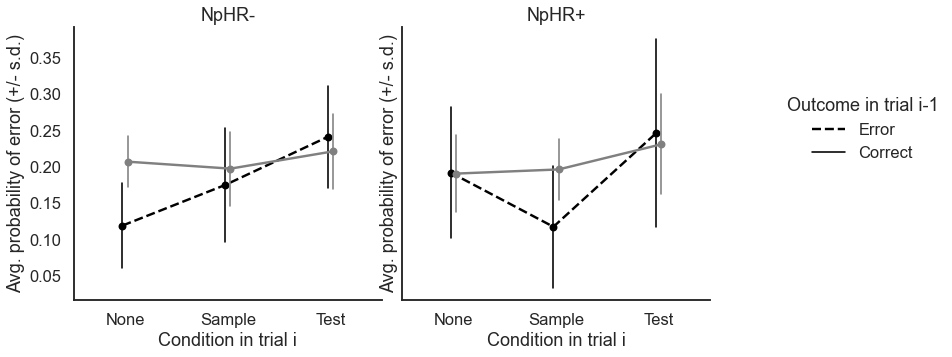

In [16]:
sns.set(style='white', context='talk')
plt.figure(dpi=300)
#p_shift['shifted1']=p_shift['shifted1'].astype(str)
g = sns.catplot(
    kind='point',
    data=p_shift,
    col='group', y='prob', 
    x='stim_condition', 
    hue='outcome_shifted',
    dodge=True, ci='sd',
    errwidth=1.6, palette=['black', 'gray'],
    linestyles=['dashed', 'solid'],
    scale=.6, legend=False
)
g.set(xlabel='Condition in trial i', xticklabels=['None', 'Sample', 'Test'],
      ylabel='Avg. probability of error (+/- s.d.)')

plt.legend(title='Outcome in trial i-1', loc='upper left', labels=['Error', 'Correct'],
          bbox_to_anchor=[1.2,.8], frameon=False)
ax =  g.axes.flatten()
ax[0].set_title('NpHR-')
ax[1].set_title('NpHR+')

In [33]:
normality_testing_shapiro(p_shift, ['group','stim_condition','shifted1'], 'prob')

NameError: name 'normality_testing_shapiro' is not defined

In [34]:
'''from scipy.stats import mannwhitneyu

def inference_shifted_outcome_effect(group):
    
    e = group[group['shifted1']==0]
    c = group[group['shifted1']==1]
    print(group[['group', 'stim_condition']].head(1))
    u, p = mannwhitneyu(e['prob'], c['prob'])
    print(u,p)

#p-value following Bonferroni correction (3 per group): 
p_corrected = 0.05/3
print('p-value following Bonferroni correction:{}'.format(p_corrected))
p_shift.groupby(['group','stim_condition']).apply(inference_shifted_outcome_effect)'''

p-value following Bonferroni correction:0.016666666666666666
  group  stim_condition
0  CTRL               0
0.0 0.0
  group  stim_condition
6  CTRL               1
0.0 0.0
  group  stim_condition
2  CTRL               3
0.0 0.0
   group  stim_condition
40  NPHR               0
0.0 0.0
   group  stim_condition
42  NPHR               1
0.0 0.0
   group  stim_condition
44  NPHR               3
0.0 0.0


C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\scipy\stats\stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\scipy\stats\stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\scipy\stats\stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\scipy\stats\stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\scipy\stats\stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
C:\Users\anasofiaccruz\Anaconda3\envs\ds\lib\site-packages\scipy\stats\stats.py:7171: RuntimeWarning: divide by zero enc

""
